# SI 671 Homework 2
Chenyun Tao  Uniq: cyuntao

## Load & Transform the Data
a)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np
from scipy.spatial.distance import cosine

In [2]:
def load_data():
    df = pd.read_csv('time_series_covid19_confirmed_global.csv').set_index('Country/Region')
    df = df.filter(regex=r"[0-9]+/[0-9]+/[0-9]+", axis="columns")
    df.index.name = None
    top5Countries = df.loc[df['8/21/20'].sort_values(ascending=False)[:5].index].T
    top5Countries.index = pd.to_datetime(top5Countries.index, infer_datetime_format=True)
    top5Daily = top5Countries.diff()
    top5Daily.dropna(inplace=True)
    return top5Daily

In [3]:
top5Daily = load_data()
top5Daily

,US,Brazil,India,Russia,South Africa
2020-01-23,0.0,0.0,0.0,0.0,0.0
2020-01-24,1.0,0.0,0.0,0.0,0.0
2020-01-25,0.0,0.0,0.0,0.0,0.0
2020-01-26,3.0,0.0,0.0,0.0,0.0
2020-01-27,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
2020-08-17,35112.0,19373.0,55018.0,4839.0,2541.0
2020-08-18,44091.0,47784.0,64572.0,4718.0,2258.0
2020-08-19,47408.0,49298.0,69672.0,4790.0,3916.0
2020-08-20,44023.0,45323.0,68900.0,4767.0,3880.0


In [4]:
top5Daily.index  # check - index

DatetimeIndex(['2020-01-23', '2020-01-24', '2020-01-25', '2020-01-26',
               '2020-01-27', '2020-01-28', '2020-01-29', '2020-01-30',
               '2020-01-31', '2020-02-01',
               ...
               '2020-08-12', '2020-08-13', '2020-08-14', '2020-08-15',
               '2020-08-16', '2020-08-17', '2020-08-18', '2020-08-19',
               '2020-08-20', '2020-08-21'],
              dtype='datetime64[ns]', length=212, freq=None)

In [5]:
top5Daily.isna().any()  # check - no NAN values

US              False
Brazil          False
India           False
Russia          False
South Africa    False
dtype: bool

b)

In [6]:
def plotHelper(df, title, legend=True):
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(df)
    ax.set_xlabel("Month")
    ax.set_ylabel("# Cases")
    if legend:
        ax.legend(df.columns)
    ax.set_title(title)

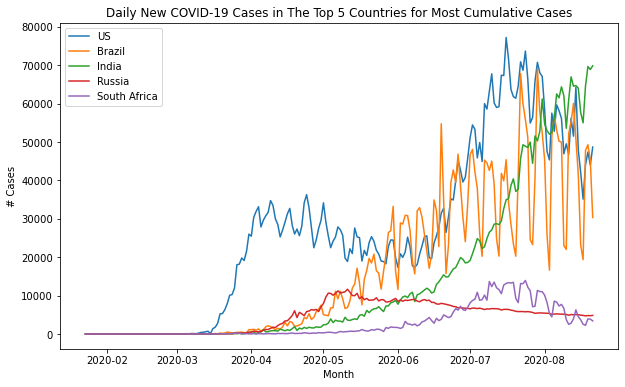

In [7]:
plotHelper(top5Daily, "Daily New COVID-19 Cases in The Top 5 Countries for Most Cumulative Cases")

## Extract Seasonal Components
a)

In [8]:
def sea_decomp(df):
    return pd.concat([pd.DataFrame({col: seasonal_decompose(df[col], model='additive').seasonal}
                                  ) for col in df.columns], axis=1)

In [9]:
top5Sea = sea_decomp(top5Daily)
top5Sea

,US,Brazil,India,Russia,South Africa
2020-01-23,2431.761670,3380.626554,441.179428,-54.886371,322.986535
2020-01-24,3446.796153,3457.641332,621.396176,23.689984,362.434811
2020-01-25,578.564626,586.665963,594.066127,55.034811,391.346141
2020-01-26,-2728.454422,-6031.950950,46.655454,137.908703,76.880131
2020-01-27,-3293.854422,-7144.674760,-1234.673118,1.842036,-507.496059
...,...,...,...,...,...
2020-08-17,-3293.854422,-7144.674760,-1234.673118,1.842036,-507.496059
2020-08-18,-719.521088,1549.577621,-544.749308,-28.929392,-662.877011
2020-08-19,284.707483,4202.114239,76.125240,-134.659770,16.725452
2020-08-20,2431.761670,3380.626554,441.179428,-54.886371,322.986535


b)

In [10]:
def plot5Helper(df, title):
    fig, axes = plt.subplots(len(df.columns), 1, figsize=(10, 6), sharex=True)
    for i, col in enumerate(df.columns):
        axes[i].plot(df[col])
        axes[i].set_ylabel(col + ' cases')
    axes[-1].set_xlabel('Month')
    fig.suptitle(title, x=0.513, y=0.95)

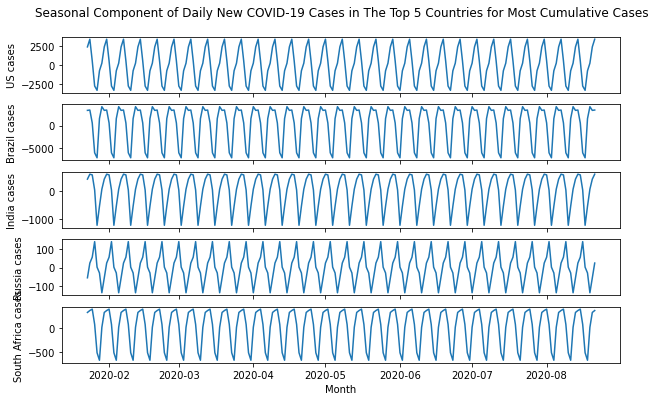

In [11]:
plot5Helper(top5Sea, "Seasonal Component of Daily New COVID-19 Cases in The Top 5 Countries for Most Cumulative Cases")

## Time Series Similarities
### Euclidean Distance
a)

In [12]:
def calc_euclidean_dist(df):
    cols = df.columns
    result = pd.DataFrame(0, index=cols, columns=cols)
    for i in range(len(cols)):
        for j in range(i+1, len(cols)):
            result.loc[cols[i], cols[j]] = np.sqrt(np.sum(np.square(df[cols[i]] - df[cols[j]])))
    result += result.T
    return result

In [13]:
calc_euclidean_dist(top5Daily)

,US,Brazil,India,Russia,South Africa
US,0.000000,233760.757213,272344.138927,433638.331574,436238.175972
Brazil,233760.757213,0.000000,178779.663740,306032.283923,304919.698741
India,272344.138927,178779.663740,0.000000,316862.767630,303936.538967
Russia,433638.331574,306032.283923,316862.767630,0.000000,67392.593681
South Africa,436238.175972,304919.698741,303936.538967,67392.593681,0.000000


b)

In [14]:
calc_euclidean_dist(top5Sea)

,US,Brazil,India,Russia,South Africa
US,0.000000,37616.752035,27032.887714,33986.305519,30084.544171
Brazil,37616.752035,0.000000,57583.437987,63663.896821,60839.376478
India,27032.887714,57583.437987,0.000000,9102.412727,4490.020448
Russia,33986.305519,63663.896821,9102.412727,0.000000,5658.222387
South Africa,30084.544171,60839.376478,4490.020448,5658.222387,0.000000


### Cosine Similarity
a)

In [15]:
def calc_cos_sim(df):
    cols = df.columns
    result = pd.DataFrame(0, index=cols, columns=cols)
    for i in range(len(cols)):
        for j in range(i+1, len(cols)):
            result.loc[cols[i], cols[j]] = 1 - cosine(df[cols[i]], df[cols[j]])
    result += result.T
    np.fill_diagonal(result.values, 1)
    return result

In [16]:
calc_cos_sim(top5Daily)

,US,Brazil,India,Russia,South Africa
US,1.000000,0.898664,0.847160,0.804740,0.884909
Brazil,0.898664,1.000000,0.878452,0.763523,0.871214
India,0.847160,0.878452,1.000000,0.590388,0.809944
Russia,0.804740,0.763523,0.590388,1.000000,0.638246
South Africa,0.884909,0.871214,0.809944,0.638246,1.000000


b)

In [17]:
calc_cos_sim(top5Sea)

,US,Brazil,India,Russia,South Africa
US,1.000000,0.868859,0.783851,-0.325065,0.664261
Brazil,0.868859,1.000000,0.632741,-0.629987,0.403198
India,0.783851,0.632741,1.000000,0.092292,0.917529
Russia,-0.325065,-0.629987,0.092292,1.000000,0.174437
South Africa,0.664261,0.403198,0.917529,0.174437,1.000000


## Dynamic Time Warping (DTW) Cost
### Define a Function to Calculate DTW Cost
a)

In [18]:
def calc_pairwise_dtw_cost(x, y, ret_matrix=True):
    dtw = np.zeros((len(y) + 1, len(x) + 1))
    for i in range(len(y) + 1):
        for j in range(len(x) + 1):
            dtw[i, j] = np.inf
    dtw[0, 0] = 0
    for i in range(1, len(y) + 1):
        for j in range(1, len(x) + 1):
            cost = np.sum(np.square(y[i-1] - x[j-1]))
            dtw[i, j] = cost + np.min([dtw[i-1, j], dtw[i, j-1], dtw[i-1, j-1]])
    if ret_matrix:
        return dtw[1:, 1:]
    return dtw[len(y), len(x)]

### Compute Pairwise DTW Cost
a)

In [19]:
def calc_dtw_cost(df):
    cols = df.columns
    result = pd.DataFrame(0, index=cols, columns=cols)
    for i in range(len(cols)):
        for j in range(i+1, len(cols)):
            result.loc[cols[i], cols[j]] = calc_pairwise_dtw_cost(df[cols[i]], df[cols[j]], False)
    result += result.T
    np.fill_diagonal(result.values, 0)
    return result

In [20]:
calc_dtw_cost(top5Daily)

,US,Brazil,India,Russia,South Africa
US,0.000000e+00,9.575974e+09,5.187397e+09,1.740747e+11,1.395159e+11
Brazil,9.575974e+09,0.000000e+00,1.430988e+10,8.361811e+10,6.542703e+10
India,5.187397e+09,1.430988e+10,0.000000e+00,9.927626e+10,8.728950e+10
Russia,1.740747e+11,8.361811e+10,9.927626e+10,0.000000e+00,1.638671e+08
South Africa,1.395159e+11,6.542703e+10,8.728950e+10,1.638671e+08,0.000000e+00


b)

In [21]:
np.sqrt(calc_dtw_cost(top5Sea))

,US,Brazil,India,Russia,South Africa
US,0.000000,31878.178988,23565.948799,32327.414867,28016.515162
Brazil,31878.178988,0.000000,53400.789074,61868.013722,57143.198022
India,23565.948799,53400.789074,0.000000,7687.627537,4463.425362
Russia,32327.414867,61868.013722,7687.627537,0.000000,4259.096369
South Africa,28016.515162,57143.198022,4463.425362,4259.096369,0.000000


In general, the similarities among these seasonal patterns aren't so significant, but there're a few similar pairs, for example, seasonal patterns between India and South Africa. The results of the pairwise Euclidean Distance and DTW Cost calculations tell the same story here, but their results are different from those of Cosine Similarity. For example, the Euclidean Distance and the DTW Cost of seasonal patterns between US and Brazil aren't small, but cosine similarity of US and Brazil in seasonal patterns is relatively large, which is contradictory.